In [1]:
import numpy as np 
import pandas as pd 
from  sklearn.model_selection import   train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("sales_data.csv")
df

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1010,2023-04-15,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie
996,1067,2023-09-07,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob
997,1018,2023-04-27,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David
998,1100,2023-12-20,David,West,1629.47,39,Electronics,3685.03,3743.39,New,0.01,Bank Transfer,Online,West-David


In [3]:
df.shape

(1000, 14)

In [4]:
df.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [5]:
df.isna().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

In [6]:
df.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')

In [7]:
lb=LabelEncoder()
df['Region']=lb.fit_transform(df['Region'])
df['Product_Category']=lb.fit_transform(df['Product_Category'])
df['Customer_Type']=lb.fit_transform(df['Customer_Type'])
df['Payment_Method']=lb.fit_transform(df['Payment_Method'])
df['Sales_Channel']=lb.fit_transform(df['Sales_Channel'])



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   int64  
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   int64  
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   int64  
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   int64  
 12  Sales_Channel         1000 non-null   int64  
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(7), object(3)
memory usage: 109.5+ KB


In [9]:
df['Profit Per Unit']=df['Unit_Price']- (df['Unit_Cost'])
df

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Profit Per Unit
0,1052,2023-02-03,Bob,1,5053.97,18,3,152.75,267.22,1,0.09,1,0,North-Bob,114.47
1,1093,2023-04-21,Bob,3,4384.02,17,3,3816.39,4209.44,1,0.11,1,1,West-Bob,393.05
2,1015,2023-09-21,David,2,4631.23,30,2,261.56,371.40,1,0.20,0,1,South-David,109.84
3,1072,2023-08-24,Bob,2,2167.94,39,0,4330.03,4467.75,0,0.02,2,1,South-Bob,137.72
4,1061,2023-03-24,Charlie,0,3750.20,13,1,637.37,692.71,0,0.08,2,0,East-Charlie,55.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1010,2023-04-15,Charlie,1,4733.88,4,2,4943.03,5442.15,1,0.29,1,0,North-Charlie,499.12
996,1067,2023-09-07,Bob,1,4716.36,37,0,1754.32,1856.40,0,0.21,0,1,North-Bob,102.08
997,1018,2023-04-27,David,2,7629.70,17,0,355.72,438.27,1,0.06,0,0,South-David,82.55
998,1100,2023-12-20,David,3,1629.47,39,1,3685.03,3743.39,0,0.01,0,0,West-David,58.36


In [10]:
df.to_csv("sales_data_processed.csv",index=False)

In [11]:
df['Sales_Rep'].unique()
df['Sales_Rep']=lb.fit_transform(df['Sales_Rep'])

In [12]:
df.drop(['Sale_Date','Region_and_Sales_Rep'],axis=1,inplace=True)

In [13]:
df.corr()

,Product_ID,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Profit Per Unit
Product_ID,1.000000,-0.023596,0.038321,0.010221,0.094479,0.046836,0.013402,0.015116,-0.024933,-0.022097,0.012393,-0.004774,0.017390
Sales_Rep,-0.023596,1.000000,-0.019143,-0.042136,0.037575,-0.033122,0.010793,0.011707,-0.033407,0.090681,0.022732,0.039894,0.009315
Region,0.038321,-0.019143,1.000000,0.031911,0.062212,0.042406,0.004230,0.005946,0.048619,-0.056979,-0.032604,-0.037247,0.017312
Sales_Amount,0.010221,-0.042136,0.031911,1.000000,-0.041599,0.003115,0.009770,0.011812,0.016484,0.023153,0.010661,-0.006632,0.020655
Quantity_Sold,0.094479,0.037575,0.062212,-0.041599,1.000000,0.001503,0.053888,0.057296,-0.057249,-0.007806,-0.028224,-0.032338,0.034874
Product_Category,0.046836,-0.033122,0.042406,0.003115,0.001503,1.000000,-0.009541,-0.006855,0.078617,0.012026,-0.035304,-0.022300,0.026919
Unit_Cost,0.013402,0.010793,0.004230,0.009770,0.053888,-0.009541,1.000000,0.995056,-0.023044,-0.017741,-0.020773,-0.041348,-0.038920
Unit_Price,0.015116,0.011707,0.005946,0.011812,0.057296,-0.006855,0.995056,1.000000,-0.026473,-0.017027,-0.013201,-0.041513,0.060517
Customer_Type,-0.024933,-0.033407,0.048619,0.016484,-0.057249,0.078617,-0.023044,-0.026473,1.000000,0.007678,0.047084,0.032202,-0.034745
Discount,-0.022097,0.090681,-0.056979,0.023153,-0.007806,0.012026,-0.017741,-0.017027,0.007678,1.000000,-0.007713,-0.001921,0.006994


In [14]:
df

,Product_ID,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Profit Per Unit
0,1052,1,1,5053.97,18,3,152.75,267.22,1,0.09,1,0,114.47
1,1093,1,3,4384.02,17,3,3816.39,4209.44,1,0.11,1,1,393.05
2,1015,3,2,4631.23,30,2,261.56,371.40,1,0.20,0,1,109.84
3,1072,1,2,2167.94,39,0,4330.03,4467.75,0,0.02,2,1,137.72
4,1061,2,0,3750.20,13,1,637.37,692.71,0,0.08,2,0,55.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1010,2,1,4733.88,4,2,4943.03,5442.15,1,0.29,1,0,499.12
996,1067,1,1,4716.36,37,0,1754.32,1856.40,0,0.21,0,1,102.08
997,1018,3,2,7629.70,17,0,355.72,438.27,1,0.06,0,0,82.55
998,1100,3,3,1629.47,39,1,3685.03,3743.39,0,0.01,0,0,58.36


<Axes: >

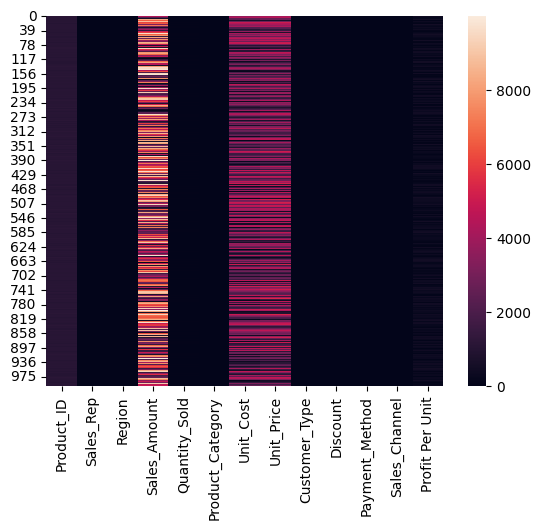

In [15]:
sns.heatmap(df)

In [16]:
df['Sales_Amount'] = df['Sales_Amount'].astype(int)


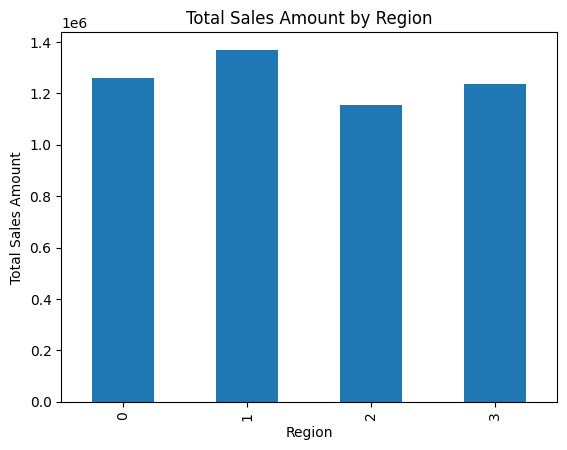

In [19]:
region_sales = df.groupby('Region')['Sales_Amount'].sum()
region_sales.plot(kind='bar', title='Total Sales Amount by Region')
plt.xlabel('Region')        
plt.ylabel('Total Sales Amount')
plt.show()



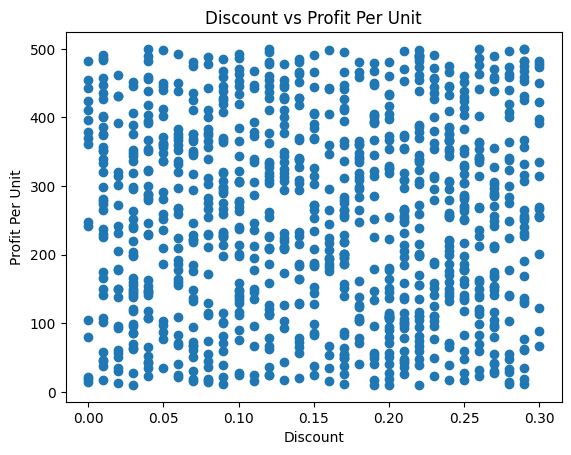

In [20]:
plt.figure()
plt.scatter(df['Discount'], df['Profit Per Unit'])
plt.xlabel('Discount')
plt.ylabel('Profit Per Unit')
plt.title('Discount vs Profit Per Unit')
plt.show()
